In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn import svm
from sklearn.metrics import make_scorer
from math import log
import warnings
warnings.filterwarnings("ignore")

In [2]:
df5 = pd.read_csv("https://raw.githubusercontent.com/chima222/5241-Statistical-machine-learning/master/hw3/train.5.txt",sep = ",",header = None)
df6 = pd.read_csv("https://raw.githubusercontent.com/chima222/5241-Statistical-machine-learning/master/hw3/train.6.txt",sep = ",",header = None)

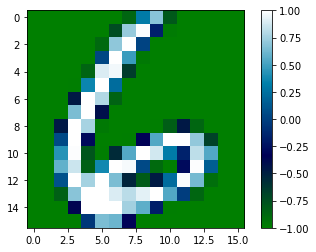

In [3]:
#plot a random data point
data_point = df6.iloc[9:10,]
d1 = data_point.as_matrix()
d1_reshaped = np.reshape(d1,(16,16))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.imshow(d1_reshaped,interpolation = "nearest",cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [4]:
#Add data set and split test = 0.2
df = pd.concat((df5,df6))
df = np.array(df)
y_array = np.append([np.repeat(-1,len(df5))],[np.repeat(1,len(df6))])
x_train,x_test,y_train,y_test = train_test_split(df,y_array,test_size = 0.2,random_state = 1)

# P1 Linear SVM

Build missclassification rate function

In [5]:
def misclassification_rate(y_true, y_pred):
    error = sum(y_true != y_pred)/len(y_true)
    return(error)

Set paramters

In [6]:
svm_error = make_scorer(misclassification_rate,greater_is_better = False)
C_arr = np.logspace(-4,3,8)
param_grid = {"C": C_arr}
cross_validation = StratifiedKFold(5)


Run models & Give results

In [7]:
gs = GridSearchCV(svm.SVC(kernel = "linear"), 
                   scoring = svm_error, 
                   param_grid = param_grid, 
                   cv = cross_validation)
                   
gs.fit(x_train,y_train)
                   
best_c = gs.best_params_
lowest_score = gs.best_score_

In [8]:
print("Best parameter: {}".format(best_c))
print("Lowest misclassification rate: {}".format(lowest_score*-1))

Best parameter: {'C': 0.01}
Lowest misclassification rate: 0.018442622950819672


Plot missclassification rate / C

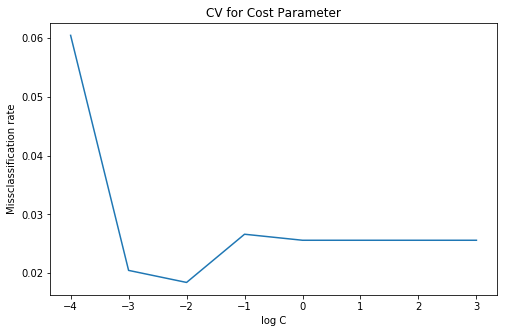

In [9]:
scores = [-x[1] for x in gs.grid_scores_]
log_C = [log(y,10) for y in C_arr]

plt.figure(figsize=(8,5))
plt.plot(log_C,scores)
plt.xlabel("log C")
plt.ylabel("Missclassification rate")
plt.title("CV for Cost Parameter")
plt.show()

# P1 RBF SVM

In [10]:
gammas = [0.1,0.01,0.0001,0.00001,0.000001]
param_grid2 = {"C": C_arr, "gamma" : gammas}

gs2 = GridSearchCV(svm.SVC(kernel = "rbf"),
                   param_grid = param_grid2,
                   cv = cross_validation, 
                   scoring = svm_error)

gs2.fit(x_train,y_train)

best_parameters = gs2.best_params_
lowest_score2 = gs2.best_score_

In [11]:
print("Best parameter: {}".format(best_parameters))
print("Lowest misclassification rate: {}".format(lowest_score2*-1))

Best parameter: {'C': 10.0, 'gamma': 0.01}
Lowest misclassification rate: 0.006147540983606556


In [12]:
scores = [-x[1] for x in gs2.grid_scores_]
scores_heatmap = np.reshape(scores, (5,8), order = "f")

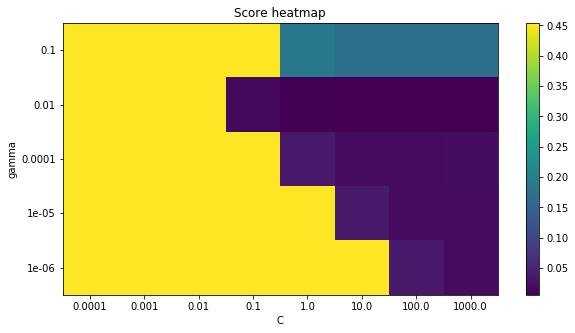

In [13]:
plt.figure(figsize = (10,5))
plt.imshow(scores_heatmap)
plt.xlabel("C")
plt.ylabel("gamma")
plt.title ("Score heatmap")
plt.xticks(np.arange(len(C_arr)),C_arr)
plt.yticks(np.arange(len(gammas)),gammas)
plt.colorbar()
plt.show()

# P2 Linear SVM

In [14]:
clf_best = svm.SVC(kernel = "linear" , C = best_c["C"])

clf_best.fit(x_train,y_train)
y_predict_test = clf_best.predict(x_test)

errors = sum(y_predict_test!=y_test)/len(y_test)
print("Best parameter: {}".format(best_c))
print("Lowest misclassification rate: {}".format(errors))

Best parameter: {'C': 0.01}
Lowest misclassification rate: 0.02459016393442623


# P2 RBF Kernel

In [15]:
best_c2 = best_parameters["C"]
best_gamma = best_parameters["gamma"]

clf2_best = svm.SVC(kernel = "rbf",C = best_c2, gamma = best_gamma)
clf2_best.fit(x_train,y_train)
y_predict_rbf = clf2_best.predict(x_test)

errors2 = sum(y_predict_rbf != y_test)/len(y_test)

print("Best parameter: {}".format(best_parameters))
print("Lowest misclassification rate: {}".format(errors2))

Best parameter: {'C': 10.0, 'gamma': 0.01}
Lowest misclassification rate: 0.012295081967213115


# Summary

Linear SVM:

C: 0.01

Misclassification rate: 0.02459

RBF kernel SVM:

C:10.0

gamma: 0.01

Misclassification rate:0.012295

SVM with RBF has a better performance than Linear SVM
                